In [1]:
import pandas as pd
'''
final_df = pd.DataFrame()
for i in range(2000, 2019):
    print(i)
    for j in range(0, 7):
        df = pd.read_html('http://www.nfl.com/draft/history/fulldraft?season=' + str(i))

        df1 = df[j].copy()

        df1.columns = df1.columns.droplevel()

        df1['year'] = i
        df1['round'] = j + 1
        final_df = final_df.append(df1)
'''
#final_df = final_df.set_index(['SEL #', 'year'])
final_df = pd.read_csv('/Users/jugalmarfatia/Documents/fall 2018/College Draft/College_Draft-/data/college_draft.csv')


In [2]:
len(final_df)

4840

In [3]:
len(final_df['SCHOOL'].unique())

304

In [4]:
final_df['Team'] = final_df['SCHOOL']

In [5]:
df_teams = pd.read_html('https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_programs', header= 0)
df_teams = df_teams[0]

In [6]:
df2 = final_df.merge(df_teams, left_on='Team', right_on='Team', how='left')
df2

,Unnamed: 0,SEL #,TEAM,PLAYER,POSITION,SCHOOL,year,round,Team,Nickname,City,State[1],CurrentConference,FormerConferences,FirstPlayed,JoinedFBS
0,0,1,Cleveland Browns,Courtney Brown,DE,Penn State,2000,1,Penn State,Nittany Lions,University Park,Pennsylvania,Big Ten,NaN,1881,NaN
1,1,2,Washington Redskins,LaVar Arrington,OLB,Penn State,2000,1,Penn State,Nittany Lions,University Park,Pennsylvania,Big Ten,NaN,1881,NaN
2,2,3,Washington Redskins,Chris Samuels,T,Alabama,2000,1,Alabama,Crimson Tide,Tuscaloosa,Alabama,SEC,"SIAA, SoCon",1892,NaN
3,3,4,Cincinnati Bengals,Peter Warrick,WR,Florida State,2000,1,Florida State,Seminoles,Tallahassee,Florida,ACC,Dixie,1947,NaN
4,4,5,Baltimore Ravens,Jamal Lewis,RB,Tennessee,2000,1,Tennessee,Volunteers,Knoxville,Tennessee,SEC,"SIAA, SoCon",1891,NaN
5,5,6,Philadelphia Eagles,Corey Simon,DT,Florida State,2000,1,Florida State,Seminoles,Tallahassee,Florida,ACC,Dixie,1947,NaN
6,6,7,Arizona Cardinals,Thomas Jones,RB,Virginia,2000,1,Virginia,Cavaliers,Charlottesville,Virginia,ACC,"SAIAA, SoCon",1888,NaN
7,7,8,Pittsburgh Steelers,Plaxico Burress,WR,Michigan State,2000,1,Michigan State,Spartans,East Lansing,Michigan,Big Ten,MIAA,1885,NaN
8,8,9,Chicago Bears,Brian Urlacher,MLB,New Mexico,2000,1,New Mexico,Lobos,Albuquerque,New Mexico,Mountain West,"BIAA, WAC",1892,NaN
9,9,10,Baltimore Ravens,Travis Taylor,WR,Florida,2000,1,Florida,Gators,Gainesville,Florida,SEC,"SIAA, SoCon",1906,NaN


In [7]:
df2[['State[1]', 'Team']].groupby(['State[1]']).count().sort_values(['Team'],  ascending=False).iloc[0:21].to_latex('/Users/jugalmarfatia/Documents/fall 2018/College Draft/College_Draft-/data/1.tex')

In [8]:
df2['legal']= (((df2['year'] >= 2013) & (df2['State[1]'] == 'Washington')) |
((df2['year'] >= 2013) & (df2['State[1]'] == 'Colorado')) |
((df2['year'] >= 2014) & (df2['State[1]'] == 'Vermont')) | 
((df2['year'] >= 2014) & (df2['State[1]'] == 'New Hampshire')) | 
((df2['year'] >= 2014) & (df2['State[1]'] == 'Illinois')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'Utah')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'Missouri')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'Minnesota')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'New York')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'Alaska')) | 
((df2['year'] >= 2015) & (df2['State[1]'] == 'Oregon')) | 
((df2['year'] >= 2015) & (df2['State[1]'].isin(['Alabama', 'Kentucky', 'Wisconsin', 'Mississippi', 'Tennessee',
                                               'Iowa', 'South Carolina','Florida', 'North Carolina', 'Missouri']))
)).astype(int)

In [9]:
df2 = df2[df2['State[1]'].notna()]
df3 = df2[['State[1]', 'year', 'Team']].groupby(['State[1]', 'year']).count().reset_index().sort_values(['State[1]', 'year'])

In [10]:
import numpy as np

df2[df2['legal']==1]['State[1]'].unique()
df3 = df3.dropna()
df2= df2[df2['State[1]'] != 'nan']

In [11]:
# libraries and data
import matplotlib.pyplot as plt
 
# Make a data frame

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('copper')
 
# multiple line plot
num=0
for column in df2['State[1]'].unique():
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(10,5, num)
 
    # Plot the lineplot
    plt.plot(df3[df3['State[1]']== column]['year'], df3[df3['State[1]']== column]['Team'] , marker='', color=palette(0), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(2000,2018) 
    plt.ylim(0,30) 
    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
    plt.xticks(df3[df3['State[1]']== column]['year'], ['2000','','','','', '2005','','','','', '2010','','','','', '2015'])

# general title

# Axis title
plt.text(0.4, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.5)
plt.suptitle("Number of NFL Drafts by State", fontsize=50, fontweight=0, color='black', style='italic')
plt.savefig('/Users/jugalmarfatia/Documents/fall 2018/College Draft/College_Draft-/data/1.pdf')

Current size:


In [12]:
df3 = df3.rename(index=str, columns={"State[1]": "state", "Team": "drafts"})

In [13]:
df3['ever_treat'] = 0 
df3.loc[df3.state.isin(('Colorado', 'Washington')),'ever_treat'] = 1

df3['treat'] = (df3.state.isin(('Colorado', 'Washington')) & (df3.year>2013)).astype(int)

In [14]:
df3.groupby(['ever_treat', 'year']).mean()

drafts  treat
ever_treat year                 
0          2000  5.323529    0.0
           2001  5.000000    0.0
           2002  5.727273    0.0
           2003  5.714286    0.0
           2004  5.687500    0.0
           2005  5.969697    0.0
           2006  5.600000    0.0
           2007  5.108108    0.0
           2008  5.542857    0.0
           2009  6.030303    0.0
           2010  5.750000    0.0
           2011  5.542857    0.0
           2012  5.823529    0.0
           2013  5.885714    0.0
           2014  6.114286    0.0
           2015  5.833333    0.0
           2016  5.970588    0.0
           2017  5.794118    0.0
           2018  5.054054    0.0
1          2000  4.500000    0.0
           2001  4.000000    0.0
           2002  5.000000    0.0
           2003  4.000000    0.0
           2004  6.000000    0.0
           2005  3.000000    0.0
           2006  3.500000    0.0
           2007  3.500000    0.0
           2008  1.500000    0.0
           2009  1.500000    0.0
           2010  1.500000    0.0
           2011  3.500000    0.0
           2012  2.000000    0.0
           2013  2.000000    0.0
           2014  3.000000    1.0
           2015  4.000000    1.0
           2016  2.500000    1.0
           2017  5.000000    1.0
           2018  4.500000    1.0

In [15]:
df3 = df3.set_index(['state', 'year'])
df3


drafts  ever_treat  treat
state         year                           
Alabama       2000       7           0      0
              2001       6           0      0
              2002       7           0      0
              2003       5           0      0
              2004       8           0      0
              2005       9           0      0
              2006       9           0      0
              2007       8           0      0
              2008       6           0      0
              2009       8           0      0
              2010      12           0      0
              2011      10           0      0
              2012      10           0      0
              2013      10           0      0
              2014      12           0      0
              2015      12           0      0
              2016      10           0      0
              2017      16           0      0
              2018      16           0      0
Arizona       2000      11           0      0
              2001       5           0      0
              2002       4           0      0
              2003       6           0      0
              2004       2           0      0
              2005       3           0      0
              2006       3           0      0
              2007       6           0      0
              2008       9           0      0
              2009       4           0      0
              2010       6           0      0
...                    ...         ...    ...
West Virginia 2017       2           0      0
              2018       1           0      0
Wisconsin     2000       4           0      0
              2001       8           0      0
              2002       4           0      0
              2003       4           0      0
              2004       3           0      0
              2005       7           0      0
              2006       5           0      0
              2007       1           0      0
              2008       4           0      0
              2009       4           0      0
              2010       2           0      0
              2011       5           0      0
              2012       6           0      0
              2013       3           0      0
              2014       5           0      0
              2015       2           0      0
              2016       2           0      0
              2017       3           0      0
              2018       5           0      0
Wyoming       2001       1           0      0
              2004       1           0      0
              2006       1           0      0
              2007       1           0      0
              2011       1           0      0
              2014       2           0      0
              2015       1           0      0
              2017       2           0      0
              2018       1           0      0

[697 rows x 3 columns]

In [16]:
from linearmodels import PanelOLS
import statsmodels.api as sm

exog_vars = ['treat']
exog = sm.add_constant(df3[exog_vars])

mod = PanelOLS(df3.drafts, exog, entity_effects=True, time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True) # Clustered Std. Errors
print(res)

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary.as_latex())
f.write(endtex)
f.close()

                          PanelOLS Estimation Summary                           
Dep. Variable:                 drafts   R-squared:                        0.0006
Estimator:                   PanelOLS   R-squared (Between):             -0.0087
No. Observations:                 697   R-squared (Within):               0.0006
Date:                Thu, Dec 06 2018   R-squared (Overall):             -0.0016
Time:                        14:37:40   Log-likelihood                   -1598.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.3646
Entities:                          40   P-value                           0.5462
Avg Obs:                       17.425   Distribution:                   F(1,656)
Min Obs:                       3.0000                                           
Max Obs:                       19.000   F-statistic (robust):             0.3951
                            

In [17]:
from scipy.optimize import fmin_slsqp, minimize
from matplotlib import pyplot as plt

def basic_dataprep(predictors_matrix, outcomes_matrix, 
             treated_unit, control_units, predictors_optimize, 
             outcomes_optimize, years_plot):
    # check if data types match expectations.
    if not type(predictors_matrix) == pd.core.frame.DataFrame:
        raise NameError("Error 1")
    elif not type(outcomes_matrix) == pd.core.frame.DataFrame:
        raise NameError("Error 2")
    elif not type(treated_unit) == str:
        raise NameError("Error 3")
    elif not type(control_units) == list:
        raise NameError("Error 4")
    elif not type(predictors_optimize) == list:
        raise NameError("Error 5")
    elif not type(outcomes_optimize) == list:
        raise NameError("Error 6")
    elif not type(years_plot) == list:
        raise NameError("Error 7")
    
    # if the list of controls contains the treated unit, remove treated unit.
    while treated_unit in control_units:
        control_units.remove(treated_unit)
    
    # check for empty lists
    if len(control_units) == 0 or len(predictors_optimize) == 0 or len(outcomes_optimize) == 0:
           raise NameError("Error 8")
    
    # check for whether there are repeated control units, or more controls
    # than columns in the input matrices.  
    if len(control_units) >= predictors_matrix.shape[1] or len(control_units) >= outcomes_matrix.shape[1]:
           print(len(control_units),  predictors_matrix.shape[1], len(control_units), outcomes_matrix.shape[1])
           raise NameError("Error 9")

    X1 = predictors_matrix[treated_unit]
    del predictors_matrix[treated_unit]
    X0 = predictors_matrix
    
    Z3 = outcomes_matrix.loc[years_plot][treated_unit]
    Z2 = outcomes_matrix.loc[years_plot][control_units]
    Z1 = outcomes_matrix.loc[outcomes_optimize][treated_unit]
    Z0 = outcomes_matrix.loc[outcomes_optimize][control_units]
             
    return X0, X1, Z0, Z1, Z2, Z3

def w_rss(w, v, x0, x1):
    k = len(x1)
    importance = np.zeros((k,k))
    np.fill_diagonal(importance, v)
    predictions = np.dot(x0, w)
    errors = x1 - predictions
    weighted_errors = np.dot(errors.transpose(), importance)
    weighted_rss = np.dot(weighted_errors,errors).item(0)
    return weighted_rss
    
def v_rss(w, z0, z1):
    predictions = np.dot(z0,w)
    errors = z1 - predictions
    rss = sum(errors**2)
    return rss

def w_constraint(w, v, x0, x1):
    return np.sum(w) - 1
    
def get_w(w, v, x0, x1):
    result = fmin_slsqp(w_rss, w, f_eqcons=w_constraint, bounds=[(0.0, 1.0)]*len(w),
             args=(v, x0, x1), disp=False, full_output=True)
    weights = result[0]
    return weights

def get_v_0(v, w, x0, x1, z0, z1):
    weights = fmin_slsqp(w_rss, w, f_eqcons=w_constraint, bounds=[(0.0, 1.0)]*len(w),
             args=(v, x0, x1), disp=False, full_output=True)[0]
    rss = v_rss(weights, z0, z1)
    return rss
    
def get_v_1(v, w, x0, x1, z0, z1):
    result = minimize(get_v_0, v, args=(w, x0, x1, z0, z1), bounds=[(0.0, 1.0)]*len(v))
    importance = result.x
    return importance
    
def get_estimate(x0, x1, z0, z1, z2):
    k,j = len(x0), z0.shape[1]
    v = [1.0/k]*k
    w = np.array([1.0/j]*j)
    predictors = get_v_1(v, w, x0, x1, z0, z1)
    controls = get_w(w, predictors, x0, x1)
    z_estimates = np.dot(z2,controls)
    return z_estimates, predictors, controls

def synth_tables(predictors_matrix, outcomes_matrix, treated_unit, control_units, 
    predictors_optimize, outcomes_optimize, years_plot):
    
    X0, X1, Z0, Z1, Z2, Z3 = basic_dataprep(predictors_matrix, outcomes_matrix, 
        treated_unit, control_units, predictors_optimize, outcomes_optimize, 
        years_plot)
        
    estimates, predictors, controls = get_estimate(X0, X1, Z0, Z1, Z2)
    
    estimated_predictors = np.dot(X0,controls)
    predictors_table = pd.DataFrame({'Synthetic':estimated_predictors, 'Actual': X1},index=X1.index)
    
    estimated_outcomes = np.dot(Z2,controls)
    outcomes_table = pd.DataFrame({'Synthetic':estimated_outcomes, 'Actual':Z3},index=Z3.index)
        
    print("Predictors Table")
    print("---")
    print(predictors_table)
    print(" ")
    print("Outcomes Table")
    print("---")
    print(outcomes_table)
    print(" ")
    print("Predictors' Weights")
    print("---")
    print(predictors)
    print(" ")
    print("Controls' Weights")
    print("---")
    print(controls)  
    
    return estimates, Z3, predictors_table, outcomes_table, predictors, controls

In [18]:
df = df3.reset_index()
df = df.pivot(index='year', columns='state', values='drafts')
df = df.fillna(0)
df.columns

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
       'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

Predictors Table
---
      Synthetic  Actual
year                   
2009   0.999970     1.0
2010   1.999960     2.0
2011   3.000057     3.0
2012   1.999980     2.0
2013   1.999999     2.0
 
Outcomes Table
---
      Synthetic  Actual
year                   
2009   0.999970     1.0
2010   1.999960     2.0
2011   3.000057     3.0
2012   1.999980     2.0
2013   1.999999     2.0
2014   2.478028     3.0
2015   3.150303     6.0
2016   1.969283     3.0
2017   2.245313     6.0
2018   2.393139     7.0
 
Predictors' Weights
---
[0.2 0.2 0.2 0.2 0.2]
 
Controls' Weights
---
[1.07338574e-05 9.25081281e-03 1.31882158e-03 1.45448430e-03
 1.02995475e-02 2.10937434e-02 2.52900099e-05 3.13525720e-02
 5.55198655e-03 5.08574260e-05 2.02031042e-03 1.30333286e-02
 2.57026580e-04 4.79369752e-03 8.38679800e-03 3.07117555e-05
 6.17525361e-04 5.24339645e-02 2.41930869e-01 3.19472954e-03
 1.06884520e-01 9.81781791e-04 1.32172677e-03 2.33491594e-05
 3.59107456e-04 6.91148560e-03 2.74545831e-05 7.04178936e-03
 3.

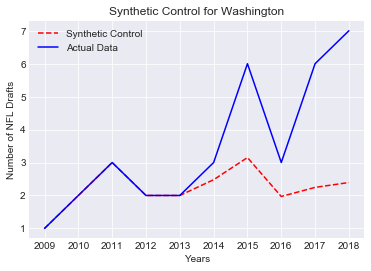

In [19]:
df1 = df.drop(columns=['Colorado'])
output = synth_tables( df1.loc['2009':'2013'], df1.loc['2009':'2018'], 'Washington', ['Alabama', 'Arizona', 'Arkansas', 'California',
                       'Connecticut', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana',
                       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
                       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
                       'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
                       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia',
                       'Wisconsin', 'Wyoming']
                      ,[2009, 2010, 2011, 2012, 2013],
                       [2009, 2010, 2011, 2012, 2013,],
                       [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
                     )
output

def plot(synth_tables):
    estimates, actual_values = synth_tables[0], synth_tables[1]
    plt.plot(range(len(estimates)),estimates, 'r--', label="Synthetic Control")
    plt.plot(range(len(estimates)),actual_values, 'b-', label="Actual Data")
    plt.title("Synthetic Control for Washington")
    plt.ylabel("Number of NFL Drafts")
    plt.xlabel("Years")
    plt.legend(loc='upper left')
    plt.xticks(range(len(estimates)), [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
    plt.savefig('/Users/jugalmarfatia/Documents/fall 2018/College Draft/College_Draft-/data/4.pdf')


plot(output)

Predictors Table
---
      Synthetic  Actual
year                   
2009   2.007628     2.0
2010   1.189705     1.0
2011   3.814085     4.0
2012   2.128996     2.0
2013   2.003784     2.0
 
Outcomes Table
---
      Synthetic  Actual
year                   
2009   2.007628     2.0
2010   1.189705     1.0
2011   3.814085     4.0
2012   2.128996     2.0
2013   2.003784     2.0
2014   2.556271     3.0
2015   2.716624     2.0
2016   2.355636     2.0
2017   1.644542     4.0
2018   1.000000     2.0
 
Predictors' Weights
---
[0.20000869 0.20008047 0.19994986 0.19997327 0.19999813]
 
Controls' Weights
---
[6.10164907e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.47038089e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.94870882e-16 3.09827940e-16 0.00000000e+00 7.47647990e-16
 0.00000000e+00 5.41019711e-16 0.00000000e+00 0.00000000e+00
 4.94438294e-16 0.00000000e+00 0.00000000e+00 2.58272635e-02
 2.44927166e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+0

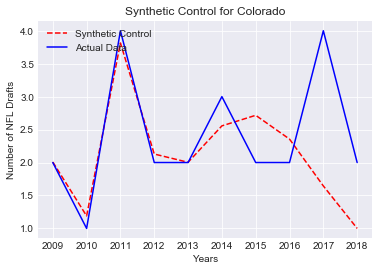

In [20]:
df1 = df.drop(columns=['Washington'])
output = synth_tables( df1.loc['2009':'2013'], df1.loc['2009':'2018'], 'Colorado', ['Alabama', 'Arizona', 'Arkansas', 'California',
                       'Colorado', 'Connecticut', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana',
                       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
                       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
                       'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
                       'Tennessee', 'Texas', 'Utah', 'Virginia', 'West Virginia',
                       'Wisconsin', 'Wyoming']
                      ,[2009, 2010, 2011, 2012, 2013],
                       [2009, 2010, 2011, 2012, 2013,],
                       [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
                     )
output

def plot(synth_tables):
    estimates, actual_values = synth_tables[0], synth_tables[1]
    plt.plot(range(len(estimates)),estimates, 'r--', label="Synthetic Control")
    plt.plot(range(len(estimates)),actual_values, 'b-', label="Actual Data")
    plt.title("Synthetic Control for Colorado")
    plt.ylabel("Number of NFL Drafts")
    plt.xlabel("Years")
    plt.legend(loc='upper left')
    plt.xticks(range(len(estimates)), [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
    plt.savefig('/Users/jugalmarfatia/Documents/fall 2018/College Draft/College_Draft-/data/3.pdf')


plt1= plot(output)